# Code used for data analysis

### Imports
Install requirements.txt for all imports.

In [1]:
import matplotlib.pyplot as plt
import pandas as pd

### Read both classified tweets csv and make them into a single dataframe

In [8]:
df1 = pd.read_csv('C:\\Users\\Jost\\data\\labeled_tweets_post_musk.csv')
df2 = pd.read_csv('C:\\Users\\Jost\\data\\labeled_tweets_pre_musk.csv')

df = pd.concat([df1, df2])

In [9]:
df.sample(n=5)

text  \
64165  By fully understanding each of the fundamental...   
41940  Your a dumb fucking monkey you should have a l...   
493    "My Dear Alice," a podcast from Professor Pame...   
15295  👨‍‍ emoji hombre emoji This BL manhwa is aweso...   
25941  Thankful for my beautiful boys! hashtag lgbtq ...   

                            date            label  
64165  2022-09-05 16:04:28+00:00  Not Hate Speech  
41940  2022-08-08 21:03:31+00:00      Hate Speech  
493    2022-10-27 14:37:42+00:00  Not Hate Speech  
15295  2022-07-09 07:17:08+00:00  Not Hate Speech  
25941  2022-11-25 14:08:18+00:00  Not Hate Speech

### Plot a graph which shows the amount of tweets labeled as Hate Speech per week

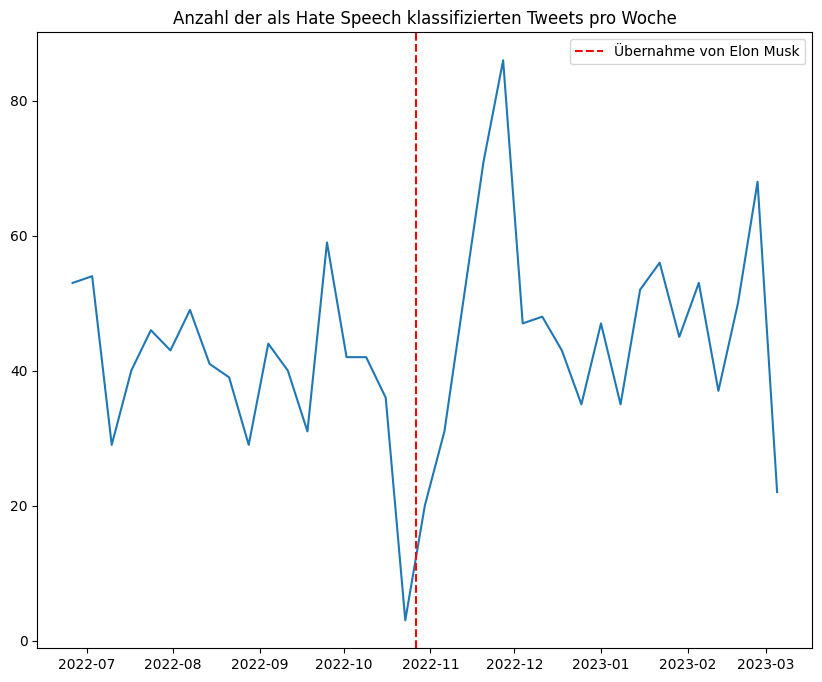

In [10]:
df['date'] = pd.to_datetime(df['date'])
df.set_index('date', inplace=True)
hate_speech_counts = df[df['label'] == 'Hate Speech'].resample('W').size() # per week

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111)
ax.plot(hate_speech_counts)
ax.axvline(pd.Timestamp('2022-10-27'), color='r', linestyle='--', label='Übernahme von Elon Musk')
ax.set_title('Anzahl der als Hate Speech klassifizierten Tweets pro Woche')
ax.legend()

### Plot a bar chart which shows the total amount of tweets labeled as Hate Speech in comparison


Text(1.8, 907, '+24.6%')

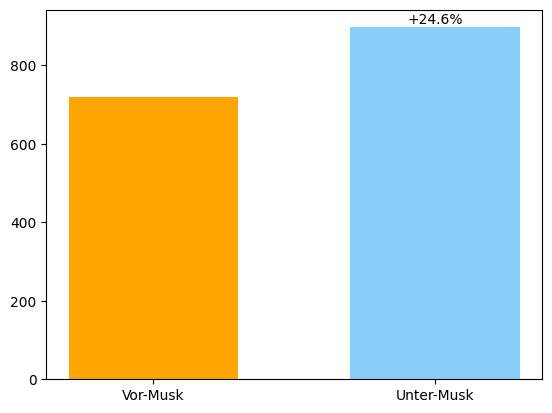

In [13]:
hate_speech_counts1 = (df2['label'] == 'Hate Speech').sum()
hate_speech_counts2 = (df1['label'] == 'Hate Speech').sum()

percent_increase = (hate_speech_counts2 - hate_speech_counts1) / hate_speech_counts1 * 100

fig, ax = plt.subplots()
ax.bar([0.8, 1.8], [hate_speech_counts1, hate_speech_counts2], width=0.6, color=['#FFA500', '#87CEFA'])
ax.set_xticks([0.8, 1.8])
ax.set_xticklabels(['Vor-Musk', 'Unter-Musk'])
ax.text(1.8, hate_speech_counts2 + 10, f"+{percent_increase:.1f}%", ha='center')